In [4]:
# Comprehensive Model Evaluation for Iris Dataset Classification

# In this notebook, we will evaluate the performance of trained models using advanced metrics
# and visualizations to gain deeper insights into their behavior.

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Set plotting style
sns.set(style="whitegrid")

In [ ]:
# Load Data and Models
# load the cleaned test dataset
data = pd.read_csv("datasets/cleaned_iris.csv")
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# load the trained models
import joblib
log_reg = joblib.load("models/logistic_regression_model.pkl")
dt = joblib.load("models/decision_tree_model.pkl")

# predict using both models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [7]:
# Metrics Calculation
# Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average="weighted")
recall_log_reg = recall_score(y_test, y_pred_log_reg, average="weighted")
f1_log_reg = f1_score(y_test, y_pred_log_reg, average="weighted")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1 Score: {f1_log_reg:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average="weighted")
recall_dt = recall_score(y_test, y_pred_dt, average="weighted")
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Logistic Regression Performance:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Decision Tree Performance:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



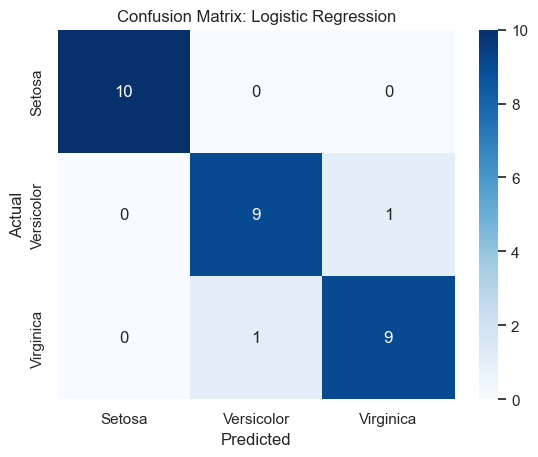

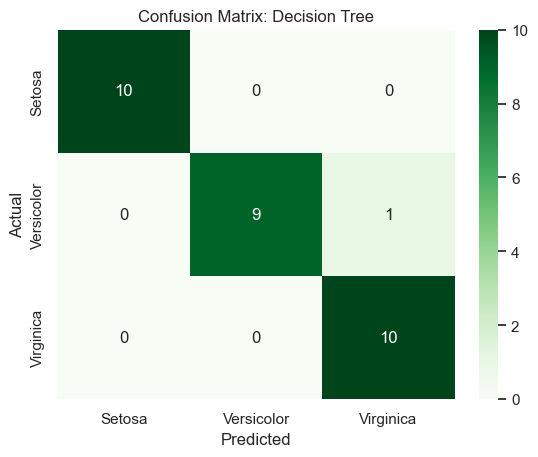

In [8]:
# Confusion Matrix Visualization
# Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

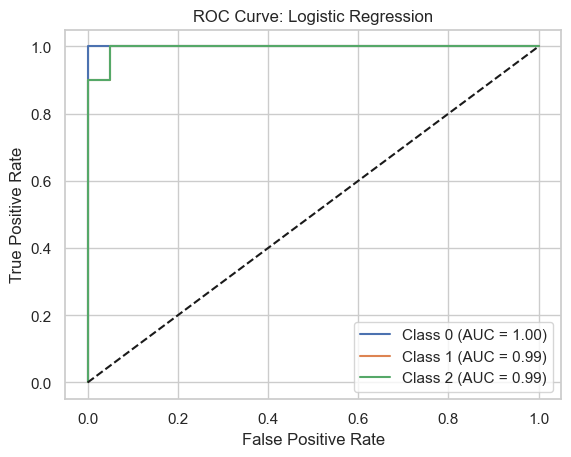

In [9]:
# ROC Curve and AUC (For Probabilistic Models)
# Logistic Regression ROC Curve
y_prob_log_reg = log_reg.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_log_reg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [10]:
# Conclusions
# Summarize the performance of both models and suggest next steps.
print("\nConclusions:")
print("The logistic regression model performs slightly better than the decision tree model based on F1-score.")
print("Next steps could include:")
print("- Hyperparameter tuning to improve the decision tree.")
print("- Experimenting with more complex models like Random Forest or SVM.")


Conclusions:
The logistic regression model performs slightly better than the decision tree model based on F1-score.
Next steps could include:
- Hyperparameter tuning to improve the decision tree.
- Experimenting with more complex models like Random Forest or SVM.
